# 일기 단어 빈도 분석
- 전체 1865개의 일기(약 5년분)
---
## ver1. 5년분 일기 전체 분석

### 1. 데이터 준비

In [1]:
# 텍스트 빈도 분석
import json
import re

from konlpy.tag import Okt

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

from nltk.tokenize import word_tokenize

In [16]:
# 파일 읽기
file_path = '/Users/min0/Documents/Documents/school/4-1/빅데이터/과제/diary.txt'
data = open(file_path, 'r')
data

<_io.TextIOWrapper name='/Users/min0/Documents/Documents/school/4-1/빅데이터/과제/diary.txt' mode='r' encoding='UTF-8'>

In [17]:
# 분석할 데이터를 message에 담기
message = ''

for text in data:
    message = message + re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', '', text)
        
message[0:1000]

'20180408 오후 1110\n교보에 간 날\n  \n7시에 일어났다 음여유롭게 씻고 밥먹고 교보에 갔다\n엄머가 5만원 주셨다 카드에 처음으로 혼자서 돈을 넣어봤다 엄마한테 전화할까했지만 해냈다 그리고 교재비랑 책까지 4만 3천원정도를 썼다\n사실 편지지도 사고싶었지만 시험끝나고 가는걸로\n생명 문제집이랑 영어문제집 그리고 영어로 된 빨간머리 앤을 샀다\n꽤 두꺼운책인데 빨리 읽어보고싶다\n계산했더니 10%할인쿠폰을 받았다 이걸로 편지지나 예쁜거 사야지 했는데 만원이상이어서 조금 둘러보다가 기념으로 가져갈까 생각했다\n근데 누군가 주고싶다는 생각이 들었다 그래서 누구를 줄까 만원 이상 사는사람 바구니가 가득 찬 사람을 둘러보기 시작했다 생각보다 잘 보이지 않았고 말이 나오기 힘들었다 심장이 엄청 뛰었다 10분쯤 돌다가 일본인 두분을 발견했다\n고민고민하다가 드렸다잘 말한거같진 않지만 받아주셨고 한국어로 감사합니다라고 해주셨다ㅜㅜ 나는 급하게 자리를 빠져나왔는데 다음엔 일본어랑 영어로 좋은여행되세요같은 말을 배워야겠다\n집에 와서는 공부를 했다 금요일 야자때 화학쌤이 알려주신 방법으로 마인드 맵고 해보고 영단어도 외우고뭐 마인드맵 빼고 맨날하는 공부를 했다\n오랜만에 일기를 쓰는데 귀찮아서 못 쓴 내용을 적자면\n혜인이짝꿍을 안적을수없다 내일 자리바꾸는데 그동안 혜인이가 간식도 많이주고\n그 뒷자리인 정민이랑 유섭이 그리고 짝꿍인 나도 기브 앤 테이크로 간식을 나눠먹었다\n야자시간에도 내가 바이오 사탕 두번 나눠주고 준표도 요구르트 3개씩 나눠주고 세준이도 과자를 나눠주었다 나누니까 더 맛있다는 말을 알겠다\n정말 감사한일이 많았는데 안쓰니까 잊어버렸다\n감사함은 참 잊기 쉬운거같다 오늘 교보에서 곰돌이 푸가 말한것 중에서 항상 행복할순 없지만 행복한일은 매일 있어인가 이런 말을 보았다\n맞다 우울한 날일지라도 행복하고 감사한일은 언제나 있었던거같다\n내일은 꿈의 대학 가는 날인데 기대되구추울까 떨린다 희주한테 문자는 언제 보낼까\n\n20180409 오후

In [13]:
JVM_PATH = '/Library/Java/JavaVirtualMachines/jdk1.8.0_361.jdk/Contents/Home/jre/lib/jli/libjli.dylib'
nlp = Okt(jvmpath=JVM_PATH)

In [6]:
# 품사 태깅 : 명사 추출

message_N = nlp.nouns(message)
message_N[0:100]

['오후',
 '교보',
 '간',
 '날',
 '음',
 '밥',
 '교보',
 '엄머',
 '카드',
 '처음',
 '혼자',
 '돈',
 '엄마',
 '교재',
 '비',
 '책',
 '사실',
 '편지지',
 '시험',
 '는걸',
 '생명',
 '집',
 '영어',
 '문제',
 '집',
 '영어',
 '머리',
 '앤',
 '꽤',
 '책',
 '계산',
 '할인',
 '쿠폰',
 '걸',
 '편지지',
 '이상',
 '조금',
 '기념',
 '생각',
 '누군가',
 '생각',
 '누구',
 '만원',
 '이상',
 '사람',
 '바구니',
 '가득',
 '찬',
 '사람',
 '둘러보기',
 '시작',
 '생각',
 '보이지',
 '말',
 '심장',
 '일본인',
 '분',
 '발견',
 '고민',
 '고민',
 '다가',
 '말',
 '거',
 '한국어',
 '나',
 '자리',
 '다음',
 '일본어',
 '영어',
 '여행',
 '말',
 '집',
 '공부',
 '금요일',
 '야자',
 '때',
 '화학',
 '쌤',
 '방법',
 '마인드',
 '맵',
 '단어',
 '뭐',
 '마인드맵',
 '공부',
 '만',
 '일기',
 '못',
 '내용',
 '적자',
 '혜인',
 '짝꿍',
 '내일',
 '자리',
 '그동안',
 '혜인',
 '간식',
 '주',
 '그',
 '자리']

In [7]:
# 불용어 제거
stop_words = "오감 아침 점심 저녁 진짜 모닝 오후 오전 아침 정말 보고 이제 그냥 다시 그거 지금 계속 뭔가 고민 조금 정도 원래 거기 때문 우리 사실 바로 사고 나중 거임 먼저 금방 중간 대충 갑자기 그때 어케 처음 그게 타고 다가 무슨 일단 역시 요새 항상 내용 가기 종일 자고 다음 기도 간다 약간 주신 별로 일찍 다른 마지막 교시 시작 도착 이번 먹음 소리 고마 요즘 이름 주심 그동안 잠간 나름 어디 자리 미리 위해 사서 일어나서 언제 보기 얼른 저번 런가 대해 수정 거의 달라 너므 모습 여기 이건 확인 추천 완전 누가 아차 마침 영상 왜냐면 이유 그것 먹기 졸리 수고 긱사와 최고 가방 표현 낫다 현영 모든 셧다 예전 가야 제대로 얼마나"

result = [word for word in message_N if not word in stop_words]

### 2. 데이터 탐색

In [8]:
# 단어 빈도 탐색

count = Counter(result)
count

Counter({'교보': 44,
         '날': 2584,
         '밥': 925,
         '엄머': 1,
         '카드': 101,
         '혼자': 225,
         '돈': 434,
         '엄마': 1539,
         '교재': 31,
         '비': 255,
         '책': 974,
         '편지지': 18,
         '시험': 383,
         '는걸': 33,
         '생명': 62,
         '집': 1266,
         '영어': 178,
         '문제': 276,
         '머리': 533,
         '앤': 30,
         '꽤': 90,
         '계산': 55,
         '할인': 29,
         '쿠폰': 39,
         '걸': 701,
         '이상': 71,
         '기념': 21,
         '생각': 2016,
         '누군가': 83,
         '누구': 85,
         '만원': 38,
         '사람': 1090,
         '바구니': 3,
         '가득': 33,
         '찬': 27,
         '둘러보기': 3,
         '보이지': 9,
         '심장': 59,
         '일본인': 3,
         '분': 319,
         '발견': 86,
         '한국어': 10,
         '일본어': 71,
         '여행': 58,
         '공부': 1523,
         '금요일': 16,
         '야자': 87,
         '화학': 41,
         '쌤': 186,
         '방법': 64,
         '마인드': 29,
         '맵'

In [9]:
# 빈번한 단어 250개 가져오기
word_count = dict()

for tag, counts in count.most_common(250):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

오늘 : 3280
생각 : 2016
엄마 : 1539
공부 : 1523
사람 : 1090
시간 : 1090
얘기 : 1028
기분 : 715
다행 : 706
할머니 : 667
하나 : 607
수업 : 604
친구 : 593
내일 : 591
감사 : 576
어제 : 566
머리 : 533
과제 : 475
하루 : 471
알바 : 461
준비 : 424
이선호 : 419
민정 : 407
이준 : 402
시험 : 383
재윤이 : 380
이해 : 371
학교 : 369
유빈 : 348
회의 : 342
강의 : 335
재윤 : 327
문자 : 326
언니 : 322
삼촌 : 312
사진 : 306
룸메 : 302
노래 : 301
버스 : 287
카톡 : 284
교수 : 279
문제 : 276
정리 : 275
사랑 : 267
루틴 : 255
선물 : 250
기억 : 245
마음 : 228
혼자 : 225
낮잠 : 225
질문 : 220
지혜 : 219
답장 : 218
은서 : 213
코딩 : 208
면접 : 206
걱정 : 206
과자 : 204
편지 : 202
아빠 : 202
다이소 : 201
구경 : 199
생일 : 198
그림 : 196
민선 : 194
운동 : 193
덕분 : 192
전화 : 188
도서관 : 185
외할머니 : 185
블로그 : 180
영화 : 179
영어 : 178
쿠키 : 176
카페 : 175
늦잠 : 174
경험 : 174
연락 : 168
샐러드 : 167
수박 : 163
재현 : 160
느낌 : 159
세준 : 157
케이크 : 156
기대 : 156
자바 : 154
코드 : 151
인생 : 150
시리얼 : 150
잠깐 : 149
초콜릿 : 147
트위터 : 147
인사 : 147
부분 : 146
서연 : 145
신청 : 141
발표 : 139
행복 : 138
학원 : 138
허리 : 136
민영 : 135
청소 : 134
간식 : 133
도움 : 133
감정 : 132
딸기 : 132
에타 : 132
대학 : 129
서현 : 129

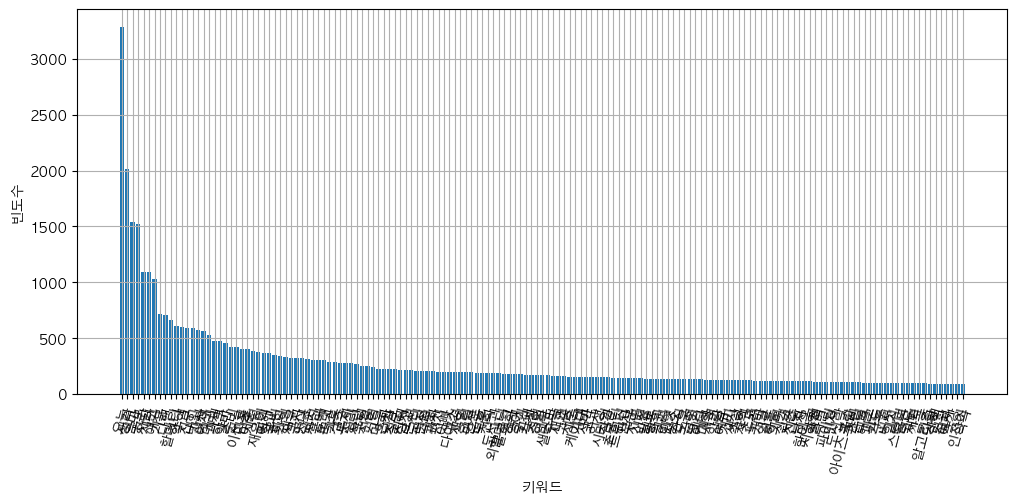

In [10]:
plt.rcParams['font.family'] = 'AppleGothic'

plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

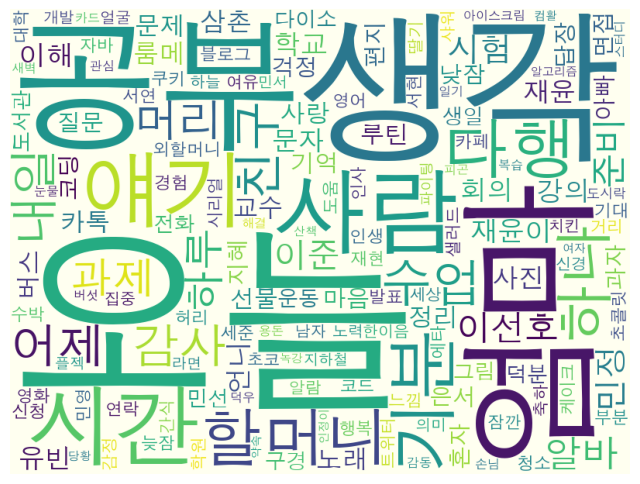

In [11]:
# 워드클라우드
wc = WordCloud(font_path='/System/Library/Fonts/Supplemental/AppleGothic.ttf', background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

## ver2. 년도별 단어 빈도 분석

In [59]:
# 파일 읽기
file_path = '/Users/min0/Documents/Documents/school/4-1/빅데이터/과제/diary.txt'
data = open(file_path, 'r')
data

<_io.TextIOWrapper name='/Users/min0/Documents/Documents/school/4-1/빅데이터/과제/diary.txt' mode='r' encoding='UTF-8'>

In [60]:
# 분석할 데이터 담기
text2018 = ''
text2019 = ''
text2020 = ''
text2021 = ''
text2022 = ''
text2023 = ''

while True:
    line2018 = data.readline()
    if line2018[:4] == "2019": break
    else: text2018 = text2018 + re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', '', line2018)
while True:
    line2019 = data.readline()
    if line2019[:4] == "2020": break
    else: text2019 = text2019 + re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', '', line2019)
while True:
    line2020 = data.readline()
    if line2020[:4] == "2021": break
    else: text2020 = text2020 + re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', '', line2020)
while True:
    line2021 = data.readline()
    if line2021[:4] == "2022": break
    else: text2021 = text2021 + re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', '', line2021)
while True:
    line2022 = data.readline()
    if line2022[:4] == "2023": break
    else: text2022 = text2022 + re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', '', line2022)
while True:
    line2023 = data.readline()
    if not line2023: break
    else: text2023 = text2023 + re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', '', line2023)

print("2018: ", len(text2018))
print("2019: ", len(text2019))
print("2020: ", len(text2020))
print("2021: ", len(text2021))
print("2022: ", len(text2022))
print("2023: ", len(text2023))

2018:  245621
2019:  328439
2020:  300028
2021:  189736
2022:  239191
2023:  136673


In [64]:
stop_words = "오감 아침 점심 저녁 오늘 내일 하루 다행 어제 진짜 모닝 오후 오전 아침 정말 보고 이제 그냥 다시 그거 지금 계속 뭔가 고민 조금 정도 원래 거기 때문 우리 사실 바로 사고 나중 거임 먼저 금방 중간 대충 갑자기 그때 어케 처음 그게 타고 다가 무슨 일단 역시 요새 항상 내용 가기 종일 자고 다음 기도 간다 약간 주신 별로 일찍 다른 마지막 교시 시작 도착 이번 먹음 소리 고마 요즘 이름 주심 그동안 잠간 나름 어디 자리 미리 위해 사서 일어나서 언제 보기 얼른 저번 런가 대해 수정 거의 달라 너므 모습 여기 이건 확인 추천 완전 누가 아차 마침 영상 왜냐면 이유 그것 먹기 졸리 수고 긱사와 최고 가방 표현 낫다 현영 모든 셧다 예전 가야 제대로 얼마나"

In [27]:
stop_words2018 = "글구 잠깐 거리 누구 애가 내내 등등 다그 와우 이도 사이 일이 자서 수원대 는걸 하자 쪼끔 학년 가면 대서"

In [28]:
# 2018 단어 빈도 분석

# 명사 추출
message_N2018 = nlp.nouns(text2018)
# 불용어 제거
temp = [word for word in message_N2018 if not word in stop_words]
result2018 = [word for word in temp if not word in stop_words2018]
# 단어 빈도 계산
count2018 = Counter(result2018)
# 빈도 높은 단어 계산
word_count2018 = dict()
for tag, counts in count2018.most_common(250):
    if(len(str(tag))>1):
        word_count2018[tag] = counts
        print("%s : %d" % (tag, counts))

민정 : 357
얘기 : 345
생각 : 333
시간 : 210
사람 : 196
친구 : 170
공부 : 169
학교 : 169
재윤이 : 162
면접 : 151
유빈 : 149
하나 : 147
세준 : 138
기분 : 123
재윤 : 122
학원 : 119
버스 : 118
준비 : 108
머리 : 107
서현 : 105
문자 : 102
노래 : 92
스터디 : 84
감사 : 83
대학 : 81
짝꿍 : 79
야자 : 76
질문 : 76
점심시간 : 73
초콜릿 : 73
민선 : 72
쉬는시간 : 71
엄마 : 68
과자 : 68
언니 : 68
기억 : 67
인정이 : 65
사진 : 63
렌즈 : 63
영어 : 62
수윤 : 62
사랑 : 61
혼자 : 57
지하철 : 57
가은이 : 56
교실 : 55
생일 : 55
인사 : 54
생명 : 53
선물 : 53
카톡 : 52
젤리 : 52
민영 : 52
수업 : 50
얼굴 : 50
시험 : 49
영화 : 49
다이소 : 49
정민 : 47
편지 : 46
마음 : 44
명주 : 43
남자 : 42
자소 : 41
답장 : 39
급식 : 38
모의 : 38
화학 : 37
도서관 : 37
걱정 : 37
인생 : 33
구경 : 33
화장 : 33
정아 : 33
문제 : 31
산책 : 31
은주 : 31
안해 : 30
답변 : 30
금촌역 : 30
전화 : 30
하늘 : 30
지민 : 29
수능 : 29
두유 : 28
연습 : 28
원피스 : 28
아빠 : 28
합격 : 28
이해 : 28
선생님 : 27
도움 : 27
화정 : 27
삼촌 : 27
알바 : 27
발표 : 27
등교 : 26
눈물 : 26
홍대 : 26
경험 : 26
덕분 : 26
카페 : 26
버정 : 26
우산 : 25
축하 : 25
외할머니 : 25
의미 : 25
감동 : 24
윤서 : 24
할머니 : 24
성민 : 24
정리 : 24
수행 : 23
세상 : 23
라면 : 23
초코 : 23
마카롱 : 23
승무원 : 23
어린왕자 : 23
발견 : 

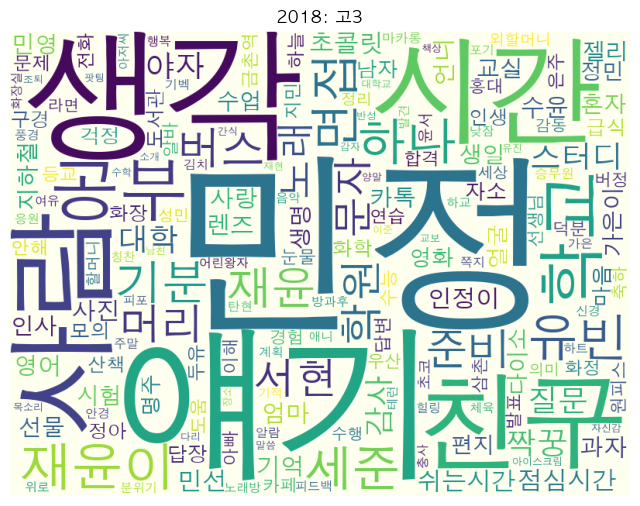

In [30]:
wc = WordCloud(font_path='/System/Library/Fonts/Supplemental/AppleGothic.ttf', background_color='ivory', width=800, height=600)
cloud2018 = wc.generate_from_frequencies(word_count2018)

plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(8,8))
plt.title("2018: 고3")
plt.imshow(cloud2018)
plt.axis('off')
plt.show()

In [37]:
stop_words2019 = "헸다 잠깐 거리 한번 관심 정보 엇다 회화 주변 의미 더니 나이 가락 호다닥 누군가 바지 다리 된거 졸라 가지 등등 부분 일기 아주"

In [38]:
# 2019 단어 빈도 분석

# 명사 추출
message_N2019 = nlp.nouns(text2019)
# 불용어 제거
temp = [word for word in message_N2019 if not word in stop_words]
result2019 = [word for word in temp if not word in stop_words2019]
# 단어 빈도 계산
count2019 = Counter(result2019)
# 빈도 높은 단어 계산
word_count2019 = dict()
for tag, counts in count2019.most_common(250):
    if(len(str(tag))>1):
        word_count2019[tag] = counts
        print("%s : %d" % (tag, counts))

생각 : 456
공부 : 398
룸메 : 302
사람 : 294
시간 : 247
얘기 : 215
엄마 : 211
감사 : 198
수업 : 196
친구 : 169
시험 : 165
유빈 : 156
하나 : 152
언니 : 141
머리 : 140
기분 : 118
준비 : 106
하루 : 102
민서 : 101
과제 : 97
컴활 : 91
도서관 : 90
학교 : 89
민선 : 86
재윤이 : 83
과자 : 83
그림 : 80
재윤 : 78
카톡 : 77
지은이 : 77
노래 : 76
이해 : 75
교수 : 72
간식 : 71
사진 : 69
경험 : 68
버스 : 67
혼자 : 67
복습 : 67
영어 : 64
에타 : 64
덕분 : 64
행복 : 61
토론 : 60
문자 : 59
유리 : 56
단어 : 54
전화 : 53
비교 : 53
이준 : 50
마음 : 50
딸기 : 48
아빠 : 47
알람 : 47
삼촌 : 46
정리 : 46
문제 : 46
걱정 : 44
신청 : 42
도움 : 42
덕우 : 42
쿠농 : 42
자수 : 42
편지 : 41
낮잠 : 41
비엘 : 41
인생 : 40
지은 : 40
케이크 : 39
초콜릿 : 39
느낌 : 39
영화 : 38
노력 : 38
인사 : 38
질문 : 37
재현 : 37
청소 : 37
긍정 : 37
지윤 : 36
답장 : 36
봉사 : 36
다이소 : 35
알바 : 35
선물 : 35
사랑 : 34
생일 : 34
연락 : 34
대학 : 34
버섯 : 34
교양 : 34
다이에이 : 34
하늘 : 33
축하 : 33
합격 : 33
혜원 : 33
은서 : 33
빨래 : 32
이선호 : 32
김치 : 32
반찬 : 32
구경 : 31
일문 : 31
기억 : 31
우유 : 31
풍경 : 30
추억 : 30
기대 : 30
동기 : 30
씨유 : 30
초코 : 30
늦잠 : 29
일본어 : 29
작가 : 29
외할머니 : 29
발표 : 29
강의 : 29
약속 : 28
시리얼 : 28
민영 : 28
간장 : 28
김치부침개 : 

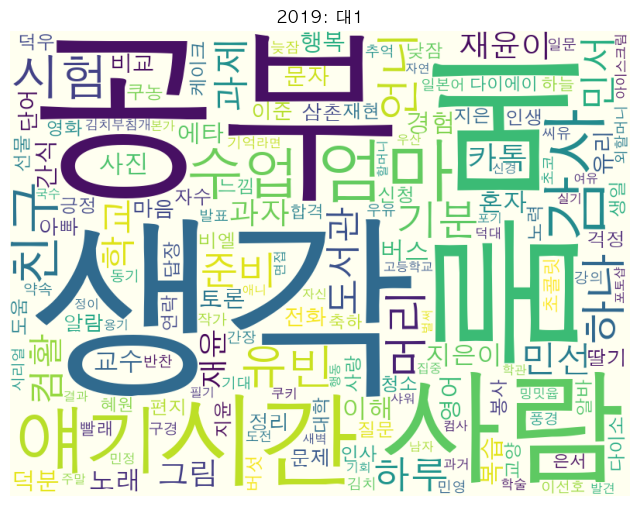

In [39]:
cloud2019 = wc.generate_from_frequencies(word_count2019)

plt.figure(figsize=(8,8))
plt.title("2019: 대1")
plt.imshow(cloud2019)
plt.axis('off')
plt.show()

In [45]:
stop_words2020 = "한문 신경 알람 느낌 잠깐 일독 상경 벌써 분설 그랫다 제출 기업 게다가 막상 의미 아아 주변 덜덜 재밋 설명 생선 오늘이 아무 해주시 잘못 일케 글케 엇다 겨우 누군가 대서 대한 "

In [52]:
# 2020 단어 빈도 분석

# 명사 추출
message_N2020 = nlp.nouns(text2020)
# 불용어 제거
temp = [word for word in message_N2020 if not word in stop_words]
result2020 = [word for word in temp if not word in stop_words2020]
# 단어 빈도 계산
count2020 = Counter(result2020)
# 빈도 높은 단어 계산
word_count2020 = dict()
for tag, counts in count2020.most_common(250):
    if(len(str(tag))>1):
        word_count2020[tag] = counts
        print("%s : %d" % (tag, counts))

생각 : 542
엄마 : 465
공부 : 403
시간 : 249
사람 : 232
과제 : 215
이선호 : 183
할머니 : 179
기분 : 171
감사 : 157
수업 : 153
자바 : 146
얘기 : 141
교수 : 134
이해 : 133
강의 : 133
하나 : 126
삼촌 : 123
머리 : 118
친구 : 117
외할머니 : 115
낮잠 : 110
코딩 : 108
하루 : 107
문제 : 92
이준 : 89
문자 : 76
답장 : 76
시리얼 : 75
카톡 : 74
시험 : 71
컴구 : 70
허리 : 67
기억 : 66
사진 : 65
정리 : 60
아빠 : 59
수박 : 57
노래 : 55
샐러드 : 55
마음 : 52
선물 : 49
학교 : 48
집중 : 46
운동 : 45
사랑 : 45
준비 : 44
연락 : 44
파이팅 : 42
기대 : 42
치과 : 42
코로나 : 41
리눅스 : 41
걱정 : 39
질문 : 39
생일 : 39
유빈 : 38
부분 : 38
게장 : 38
그림 : 37
주식 : 37
재윤이 : 36
블로그 : 36
의견 : 34
신청 : 34
민선 : 34
영화 : 33
감정 : 33
노력 : 33
당황 : 33
관심 : 32
편지 : 32
새벽 : 31
재현 : 31
은서 : 31
영어 : 31
메일 : 31
축하 : 30
트위터 : 30
거실 : 30
버스 : 29
씨언어 : 29
덕분 : 29
혼자 : 29
일기 : 29
청소 : 29
간식 : 28
전화 : 27
구경 : 27
미래 : 27
카페 : 27
라면 : 27
안경 : 27
새우 : 27
웹툰 : 27
병원 : 26
에타 : 26
아주 : 25
샤워 : 25
덕우 : 25
재미 : 25
문학 : 25
윤리 : 25
정신 : 24
존경 : 24
과거 : 24
말씀 : 24
리아 : 23
가족 : 23
초콜릿 : 23
방학 : 23
복습 : 23
딸기 : 23
나야 : 23
행동 : 23
다이소 : 23
민정 : 23
경험 : 22
침대 : 22
여자 : 22
코

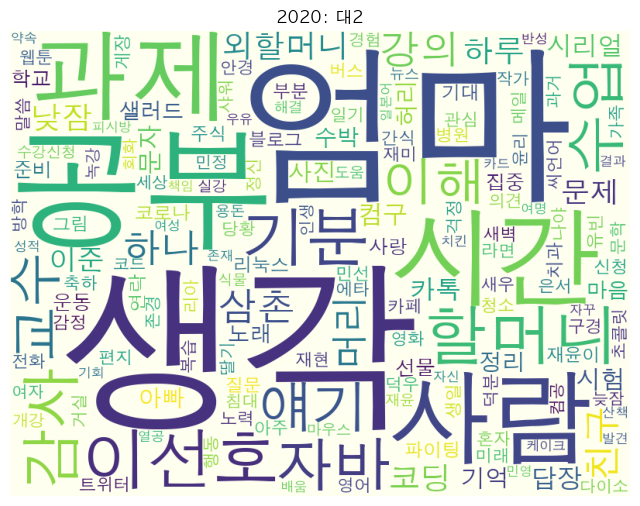

In [53]:
cloud2020 = wc.generate_from_frequencies(word_count2020)

plt.figure(figsize=(8,8))
plt.title("2020: 대2")
plt.imshow(cloud2020)
plt.axis('off')
plt.show()

In [74]:
stop_words2021 = "소공 하나 인프 멀미 부분 데베프 졸라 얼레 순간 윤리 데베 햇음 나야 하자 스코 제발 집중 스어 잠깐 헤헤 연결 해도 거저 인기 기능 기운 추가 자꾸 의미 거나 누군가 자동 수도 알람 잘못 진심 아이 대서 대박 센터 거도 해주시 무엇 전당 주변 이상 저장 업뎃 방법 대한 데이터 글케 제출 바시 굿굿 난로 거실 그대로 아주 거리 패딩 서로 잔뜩 설정 대체 안녕 다리 드뎌 하드 상태 닝모 로그인 학년"

In [75]:
# 2021 단어 빈도 분석

# 명사 추출
message_N2021 = nlp.nouns(text2021)
# 불용어 제거
temp = [word for word in message_N2021 if not word in stop_words]
result2021 = [word for word in temp if not word in stop_words2021]
# 단어 빈도 계산
count2021 = Counter(result2021)
# 빈도 높은 단어 계산
word_count2021 = dict()
for tag, counts in count2021.most_common(250):
    if(len(str(tag))>1):
        word_count2021[tag] = counts
        print("%s : %d" % (tag, counts))

공부 : 303
엄마 : 283
생각 : 264
시간 : 169
수업 : 157
할머니 : 144
사람 : 127
기분 : 123
과제 : 88
회의 : 86
강의 : 85
한이음 : 77
이선호 : 76
머리 : 71
이준 : 71
녹강 : 70
문제 : 66
감사 : 64
문자 : 63
운동 : 63
시험 : 63
얘기 : 57
알고리즘 : 52
지혜 : 51
코딩 : 48
교수 : 46
친구 : 45
재윤 : 45
선물 : 43
그림 : 42
정리 : 42
플젝 : 42
트위터 : 41
늦잠 : 41
이해 : 41
걱정 : 41
샐러드 : 40
준비 : 39
재윤이 : 39
컴그 : 39
쿠키 : 38
코드 : 38
토익 : 36
팟팅 : 36
사진 : 35
블로그 : 35
천재 : 35
구현 : 35
기대 : 32
덕분 : 32
벌레 : 32
카톡 : 31
허리 : 31
여유 : 28
사랑 : 28
편지 : 28
혼자 : 28
오류 : 28
수박 : 28
삼촌 : 27
아빠 : 27
에타 : 26
세상 : 26
조슈아 : 25
느낌 : 25
기억 : 24
덕우 : 24
열공 : 24
방학 : 24
도움 : 24
산책 : 24
발표 : 24
답장 : 23
게장 : 23
전화 : 23
노래 : 23
구경 : 22
인생 : 22
경험 : 22
낮잠 : 22
얼굴 : 21
질문 : 21
해결 : 21
유니티 : 21
룬아 : 20
용돈 : 20
재현 : 19
하늘 : 19
개발 : 19
생일 : 18
안드 : 18
구글링 : 18
새우 : 17
치킨 : 17
리바이 : 17
카페 : 17
버스 : 17
은서 : 17
서버 : 17
연강 : 17
피곤 : 17
백신 : 17
파이팅 : 16
다이소 : 16
병원 : 16
연락 : 15
침대 : 15
감동 : 15
눈물 : 15
영화 : 15
도서관 : 15
미역국 : 15
필기 : 15
위젯 : 15
관심 : 14
스토리 : 14
버섯 : 14
포기 : 14
작가 : 14
스티커 : 14
서비스 : 14
신청 :

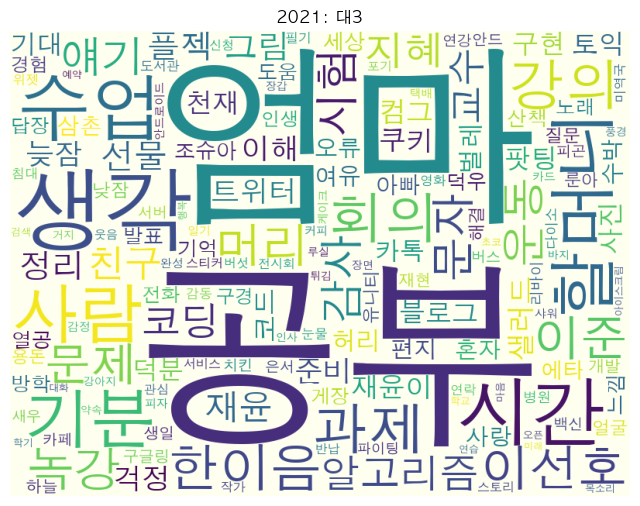

In [77]:
cloud2021 = wc.generate_from_frequencies(word_count2021)

plt.figure(figsize=(8,8))
plt.title("2021: 대3")
plt.imshow(cloud2021)
plt.axis('off')
plt.show()

In [86]:
stop_words2022 = "얘기 레전드 하나 아우 라운드 고영희 진차 어스 기억 부분 추가 신청 근처 느낌 바지 연주 텐트 거리 극적 거저 거나 아이 해주시 무난 해도 집옴 순간 지원 데미 인프 소공 머햇 잘못 햇음 자주 주시 나야 거도 깜빡 하야 영배 헤헤 오심 자꾸 대서 여기저기 드뎌 집감 스텀 서모님 페이지 롯데 마트 도리"

In [87]:
# 2022 단어 빈도 분석

# 명사 추출
message_N2022 = nlp.nouns(text2022)
# 불용어 제거
temp = [word for word in message_N2022 if not word in stop_words]
result2022 = [word for word in temp if not word in stop_words2022]
# 단어 빈도 계산
count2022 = Counter(result2022)
# 빈도 높은 단어 계산
word_count2022 = dict()
for tag, counts in count2022.most_common(250):
    if(len(str(tag))>1):
        word_count2022[tag] = counts
        print("%s : %d" % (tag, counts))

엄마 : 389
알바 : 307
할머니 : 253
생각 : 241
루틴 : 233
사람 : 159
회의 : 157
공부 : 144
시간 : 140
이준 : 111
이선호 : 99
기분 : 95
개발 : 81
사랑 : 80
블로그 : 77
손님 : 76
준비 : 72
삼촌 : 71
카페 : 67
쿠키 : 67
친구 : 66
지혜 : 66
은서 : 65
케이크 : 63
구경 : 63
이해 : 60
운동 : 60
치킨 : 59
머리 : 56
감사 : 56
플젝 : 55
정리 : 54
재윤 : 53
강의 : 52
편지 : 50
늦잠 : 49
재윤이 : 49
코드 : 48
연락 : 47
사진 : 46
버스 : 45
정산 : 45
도시락 : 45
마음 : 42
다이소 : 40
유타 : 40
재현 : 39
샐러드 : 39
기능 : 38
답장 : 38
수박 : 38
선물 : 37
코딩 : 36
안드 : 36
맥북 : 36
영화 : 35
질문 : 35
한이음 : 34
카톡 : 34
피곤 : 34
혜린 : 34
트위터 : 33
덕분 : 33
행복 : 33
피아노 : 33
언니 : 33
회전 : 33
청소 : 31
전화 : 31
매니저 : 31
주술 : 31
노래 : 30
스필 : 30
세원 : 30
마감 : 30
스마트홈 : 30
아이스크림 : 29
해결 : 29
감정 : 29
고양이 : 29
용돈 : 28
생일 : 28
발표 : 28
서버 : 28
카드 : 28
안심 : 28
알고리즘 : 27
혼자 : 27
금쪽 : 27
텍트 : 27
문제 : 26
초코 : 26
세상 : 26
인생 : 26
기대 : 26
걱정 : 26
성민 : 26
대화 : 25
여유 : 25
음료 : 25
샤워 : 24
과자 : 24
드림 : 24
노션 : 24
시험 : 23
허리 : 23
잠옷 : 23
포기 : 22
아빠 : 22
이마트 : 22
경험 : 22
말씀 : 22
약속 : 21
피피티 : 21
신경 : 21
토토 : 21
감동 : 20
딸기 : 20
노력 : 20
오류 : 20
민영 : 20


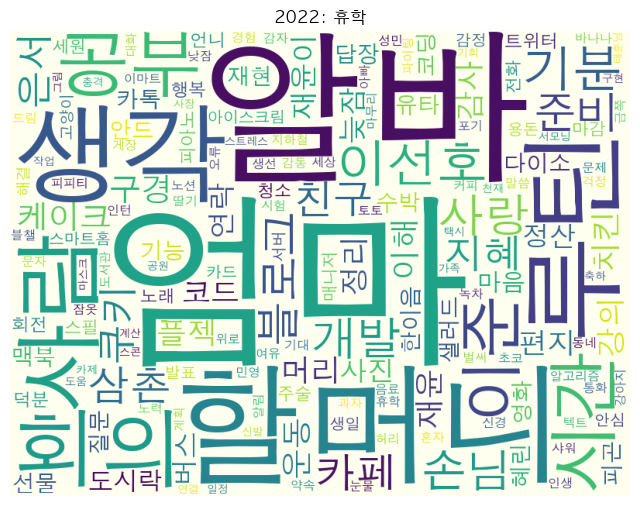

In [90]:
cloud2022 = wc.generate_from_frequencies(word_count2022)

plt.figure(figsize=(8,8))
plt.title("2022: 휴학")
plt.imshow(cloud2022)
plt.axis('off')
plt.show()

In [97]:
stop_words2023 = "생각 얘기 기분 사람 하나 기억 안심 진차 해먹 레전드 목소리 심지어 해결 겨우 해도 제발 거저 가지 의미 근처 대박 거도 미니 신가 자꾸 왜케 다리 바지 가득"

In [98]:
# 2023 단어 빈도 분석

# 명사 추출
message_N2023 = nlp.nouns(text2023)
# 불용어 제거
temp = [word for word in message_N2023 if not word in stop_words]
result2023 = [word for word in temp if not word in stop_words2023]
# 단어 빈도 계산
count2023 = Counter(result2023)
# 빈도 높은 단어 계산
word_count2023 = dict()
for tag, counts in count2023.most_common(250):
    if(len(str(tag))>1):
        word_count2023[tag] = counts
        print("%s : %d" % (tag, counts))

서연 : 140
엄마 : 123
공부 : 106
지혜 : 102
회의 : 98
알바 : 81
운체 : 81
시간 : 75
은서 : 67
이준 : 64
근로 : 64
과제 : 61
언니 : 59
도시락 : 57
정처 : 57
준비 : 55
정리 : 49
할머니 : 46
수빈 : 45
프론트 : 45
수업 : 45
빅데 : 45
서버 : 42
학교 : 42
실무 : 42
머리 : 41
코드 : 40
연결 : 40
다이소 : 38
대만 : 36
계란 : 35
졸프 : 35
이해 : 34
강의 : 34
시리얼 : 34
선물 : 33
노션 : 30
요거트 : 30
마음 : 29
사진 : 28
웹프 : 28
딸기 : 27
친구 : 26
감정 : 25
노래 : 25
일문 : 25
매니저 : 24
쿠키 : 24
느낌 : 24
카페 : 24
전화 : 24
양파 : 24
생일 : 24
여행 : 24
샤워 : 24
블로그 : 23
인사 : 23
구경 : 23
피곤 : 22
운동 : 22
초코 : 22
고기 : 22
오류 : 22
분홍 : 22
기숙사 : 21
청소 : 21
플러터 : 21
기상 : 20
공항 : 20
묵음 : 20
버섯 : 20
사랑 : 19
라면 : 19
아빠 : 19
늦잠 : 19
애니 : 19
개발 : 19
걱정 : 19
빨래 : 19
삼촌 : 18
신청 : 18
감사 : 18
발표 : 18
반찬 : 18
재현 : 18
번역 : 18
맥북 : 17
주제 : 17
세원 : 17
키링 : 17
손님 : 17
택배 : 17
토마토 : 17
혼자 : 17
스즈메 : 17
남자 : 16
카톡 : 16
간장 : 16
당황 : 16
캄보디아 : 16
토스트 : 15
여자 : 15
유튜브 : 15
볶음 : 15
일기 : 15
위로 : 15
연락 : 15
김치 : 15
코딩 : 15
캐리어 : 15
하늘 : 15
입장 : 15
그림 : 15
문제 : 15
퀴즈 : 15
용가리 : 15
루틴 : 14
경험 : 14
부분 : 14
건가 : 14
축하 : 14
피피티 : 14
교

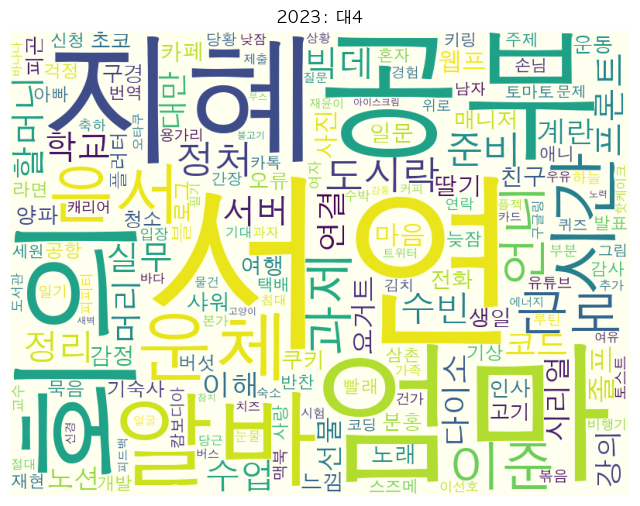

In [99]:
cloud2023 = wc.generate_from_frequencies(word_count2023)

plt.figure(figsize=(8,8))
plt.title("2023: 대4")
plt.imshow(cloud2023)
plt.axis('off')
plt.show()